In [ ]:
# Standard imports
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
! pip install kaggle #installing kaggle

In [ ]:
! mkdir ~/.kaggle #making directory

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset

100% 662M/663M [00:30<00:00, 23.9MB/s]
100% 663M/663M [00:30<00:00, 22.7MB/s]


In [ ]:
! ls

kaggle.json  sample_data  tuberculosis-tb-chest-xray-dataset.zip


In [ ]:
! unzip tuberculosis-tb-chest-xray-dataset.zip #unzipping files

Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1006.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1007.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1008.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1009.png  
  infla

In [ ]:
import pandas as pd
import os


filenames = os.listdir("TB_Chest_Radiography_Database/Normal")
categories = []
for filename in filenames:
  categories.append(0)

df1 = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

# Note: this randomizes the filenames

In [ ]:
df1.head(5)

,filename,category
0,Normal-2051.png,0
1,Normal-2321.png,0
2,Normal-1551.png,0
3,Normal-1557.png,0
4,Normal-2484.png,0


In [ ]:
len(df1)

3500

In [ ]:
categories2=[]
filenames2 = os.listdir("TB_Chest_Radiography_Database/Tuberculosis") # TB images categorized as 1
for filename in filenames2:
  categories2.append(1)

df2 = pd.DataFrame({
    'filename': filenames2,
    'category': categories2
})

In [ ]:
df2.head(5)

,filename,category
0,Tuberculosis-197.png,1
1,Tuberculosis-17.png,1
2,Tuberculosis-70.png,1
3,Tuberculosis-376.png,1
4,Tuberculosis-373.png,1


In [ ]:
len(df2)

700

In [ ]:
# Adding the two dataframes along rows
df = pd.concat([df1, df2], axis=0, ignore_index=True)

In [ ]:
df.head(5)

,filename,category
0,Normal-2051.png,0
1,Normal-2321.png,0
2,Normal-1551.png,0
3,Normal-1557.png,0
4,Normal-2484.png,0


In [ ]:
len(df)

4200

In [ ]:
df['filename']

0            Normal-2051.png
1            Normal-2321.png
2            Normal-1551.png
3            Normal-1557.png
4            Normal-2484.png
                ...         
4195    Tuberculosis-259.png
4196    Tuberculosis-527.png
4197    Tuberculosis-206.png
4198    Tuberculosis-333.png
4199    Tuberculosis-291.png
Name: filename, Length: 4200, dtype: object

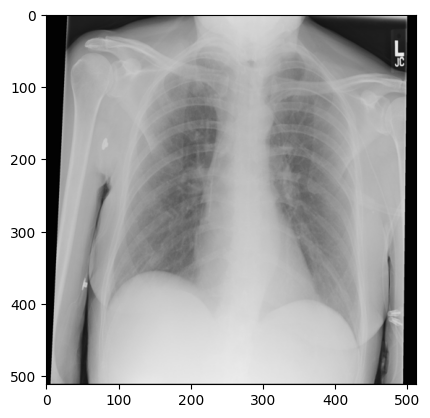

In [ ]:
#showing a sample image of normal chest xray
# >=3500 = tuberculosis, <=3500=normal images
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('TB_Chest_Radiography_Database/Normal/'+df['filename'][1700], cv2.IMREAD_COLOR)
plt.imshow(img)

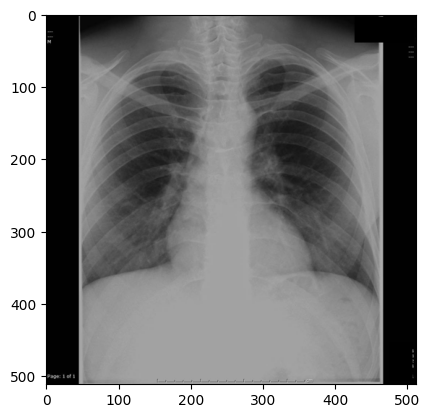

In [ ]:
#showing a sample image of tuberculosis chest xray
# >=3500 = tuberculosis, <=3500=normal images
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('TB_Chest_Radiography_Database/Tuberculosis/'+df['filename'][3700], cv2.IMREAD_COLOR)
plt.imshow(img)

In [ ]:
# Resizing images and storing in X numpy array
import numpy as np
import cv2

def resize_img(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (80,80))  # This tuple represents the final image size desired

X = np.ndarray((4200,80,80,3)) # 4200 images, 80x80 pixels, 3 channels (RGB)
i=0
for image_file in df1['filename']:
    X[i,:] = resize_img('TB_Chest_Radiography_Database/Normal/'+image_file)
    i+=1
for image_file in df2['filename']:
    X[i,:] = resize_img('TB_Chest_Radiography_Database/Tuberculosis/'+image_file)
    i+=1

In [ ]:
import numpy as np

# Assuming X is your 4D array with shape (4200, 80, 80, 3)
# Check if any row has zero values along the last axis (axis 3)
has_zeros = np.any(X == 0, axis=(1, 2, 3))

# Print the indices of rows with zero values
print("Rows with zero values:", np.where(has_zeros)[0])

# Count the number of rows with zero values
num_rows_with_zeros = np.sum(has_zeros)
print("Number of rows with zero values:", num_rows_with_zeros)

# Check if all rows are filled (no zero values)
all_rows_filled = not np.any(has_zeros)
print("All rows filled:", all_rows_filled)

Rows with zero values: [   1    2    3 ... 4194 4195 4197]
Number of rows with zero values: 3195
All rows filled: False


In [ ]:
X.shape

(4200, 80, 80, 3)

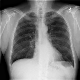

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(X[2])

In [ ]:
from sklearn.model_selection import train_test_split

# Training, validation, and testing datasets sizes
#train_size = 15000
#validation_size = 5000
#test_size = 5000

# Splitting the data into training and remaining sets
X_train, X_remaining, y_train, y_remaining = train_test_split(X, df['category'], test_size=0.3, random_state=42, stratify=df['category'])

# Splitting the remaining into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42, stratify=y_remaining)

# Checking the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2940, 80, 80, 3)
y_train shape: (2940,)
X_validation shape: (630, 80, 80, 3)
y_validation shape: (630,)
X_test shape: (630, 80, 80, 3)
y_test shape: (630,)


In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
value_counts = y_test.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


0    525
1    105
Name: category, dtype: int64
Count of 0: 525
Count of 1: 105


In [ ]:
value_counts = y_validation.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


0    525
1    105
Name: category, dtype: int64
Count of 0: 525
Count of 1: 105


In [ ]:
value_counts = y_train.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


0    2450
1     490
Name: category, dtype: int64
Count of 0: 2450
Count of 1: 490


Densenet169

In [ ]:
# preprocess_input overwrites what it is preprocessing
tf.keras.applications.densenet.preprocess_input(X_train)
tf.keras.applications.densenet.preprocess_input(X_validation)
tf.keras.applications.densenet.preprocess_input(X_test)

array([[[[-2.11790393, -2.03571429, -1.80444444],
         [-2.11790393, -2.03571429, -1.80444444],
         [-1.70690984, -1.61554622, -1.38614379],
         ...,
         [-1.82678311, -1.73809524, -1.50814815],
         [-1.82678311, -1.73809524, -1.50814815],
         [-1.80965836, -1.72058824, -1.49071895]],

        [[-2.11790393, -2.03571429, -1.80444444],
         [-2.11790393, -2.03571429, -1.80444444],
         [-1.70690984, -1.61554622, -1.38614379],
         ...,
         [-1.84390787, -1.75560224, -1.52557734],
         [-1.84390787, -1.75560224, -1.52557734],
         [-1.80965836, -1.72058824, -1.49071895]],

        [[-2.11790393, -2.03571429, -1.80444444],
         [-2.11790393, -2.03571429, -1.80444444],
         [-1.70690984, -1.61554622, -1.38614379],
         ...,
         [-1.84390787, -1.75560224, -1.52557734],
         [-1.84390787, -1.75560224, -1.52557734],
         [-1.80965836, -1.72058824, -1.49071895]],

        ...,

        [[-2.11790393, -2.03571429, -1

In [ ]:
# Resize after preprocessing
# ResNet requires at least a 32x32 image (used to require 224x224 but seems to accept 32x32 now)
X_train = tf.image.resize(X_train, [96,96])
X_validation = tf.image.resize(X_validation, [96,96])
X_test = tf.image.resize(X_test, [96,96])



In [ ]:
X_train.shape

TensorShape([2940, 96, 96, 3])

In [ ]:
X_validation.shape

TensorShape([630, 96, 96, 3])

In [ ]:
X_test.shape

TensorShape([630, 96, 96, 3])

In [ ]:
# Transfer learn from ResNet50
base_model_1X = keras.applications.DenseNet169(weights="imagenet",
                                         include_top=False,
                                         input_shape=(96,96,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model_1X.output) #Connects the global average pooling layer to the output of the base_model.
dropout = keras.layers.Dropout(0.05)(global_avg)
output = keras.layers.Dense(1, activation="sigmoid")(dropout)
model_1X = keras.models.Model(inputs=base_model_1X.input, outputs=output)

51877672/51877672 [==============================] - 4s 0us/step


In [ ]:
# Freeze transferred layers and train
%%time
for layer in base_model_1X.layers:
  layer.trainable = False

model_1X.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Nadam(1e-3),
              metrics=["accuracy"])

history_1X = model_1X.fit(X_train, y_train, batch_size=32,
                    epochs=50, validation_data=(X_validation, y_validation),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])


Epoch 1/50
92/92 [==============================] - 31s 116ms/step - loss: 0.2558 - accuracy: 0.9020 - val_loss: 0.1380 - val_accuracy: 0.9444
Epoch 2/50
92/92 [==============================] - 5s 59ms/step - loss: 0.0952 - accuracy: 0.9636 - val_loss: 0.0967 - val_accuracy: 0.9683
Epoch 3/50
92/92 [==============================] - 4s 45ms/step - loss: 0.0722 - accuracy: 0.9721 - val_loss: 0.0859 - val_accuracy: 0.9714
Epoch 4/50
92/92 [==============================] - 4s 46ms/step - loss: 0.0603 - accuracy: 0.9793 - val_loss: 0.0777 - val_accuracy: 0.9762
Epoch 5/50
92/92 [==============================] - 5s 54ms/step - loss: 0.0497 - accuracy: 0.9837 - val_loss: 0.0688 - val_accuracy: 0.9873
Epoch 6/50
92/92 [==============================] - 4s 48ms/step - loss: 0.0449 - accuracy: 0.9850 - val_loss: 0.0649 - val_accuracy: 0.9810
Epoch 7/50
92/92 [==============================] - 4s 47ms/step - loss: 0.0358 - accuracy: 0.9888 - val_loss: 0.0635 - val_accuracy: 0.9825
Epoch 8/50


In [ ]:
# Unfreeze transferred layers and train
%%time
for layer in base_model_1X.layers:
  layer.trainable = True

model_1X.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Nadam(1e-4), # need smaller lr
              metrics=["accuracy"])
# re-compiling does not change weights

history_1X = model_1X.fit(X_train, y_train, batch_size=32,
                    epochs=100, validation_data=(X_validation, y_validation),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])


Epoch 1/100
92/92 [==============================] - 181s 273ms/step - loss: 0.2935 - accuracy: 0.8997 - val_loss: 0.0289 - val_accuracy: 0.9921
Epoch 2/100
92/92 [==============================] - 18s 198ms/step - loss: 0.0232 - accuracy: 0.9942 - val_loss: 0.0300 - val_accuracy: 0.9921
Epoch 3/100
92/92 [==============================] - 18s 199ms/step - loss: 0.0100 - accuracy: 0.9983 - val_loss: 0.0156 - val_accuracy: 0.9921
Epoch 4/100
92/92 [==============================] - 19s 210ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0120 - val_accuracy: 0.9937
Epoch 5/100
92/92 [==============================] - 19s 204ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0131 - val_accuracy: 0.9937
Epoch 6/100
92/92 [==============================] - 19s 207ms/step - loss: 0.0047 - accuracy: 0.9993 - val_loss: 0.0130 - val_accuracy: 0.9937
Epoch 7/100
92/92 [==============================] - 18s 198ms/step - loss: 0.0702 - accuracy: 0.9874 - val_loss: 0.1645 - val_accuracy

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.495411 to fit



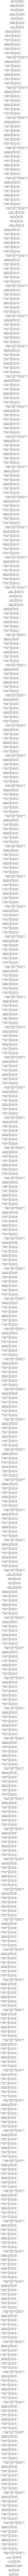

In [ ]:
keras.utils.plot_model(model_1X, show_shapes=True)

In [ ]:
# Printing validation set accuracy
val_loss, val_accuracy = model_1X.evaluate(X_validation, y_validation)
print(f"Validation Accuracy: {val_accuracy:.4f}")

20/20 [==============================] - 1s 50ms/step - loss: 0.0120 - accuracy: 0.9937
Validation Accuracy: 0.9937


In [ ]:
# Printing test set accuracy
model_1X.evaluate(X_test, y_test)

20/20 [==============================] - 1s 37ms/step - loss: 0.0062 - accuracy: 0.9968


[0.006161883473396301, 0.9968253970146179]

In [ ]:
# Save accuracy and validation accuracy for each epoch
accuracy_values_1X = history_1X.history["accuracy"]
val_accuracy_values_1X = history_1X.history["val_accuracy"]

20/20 [==============================] - 3s 34ms/step
Overall Accuracy: 0.9968
Precision: 0.9905
Recall: 0.9905
F1 Score: 0.9905


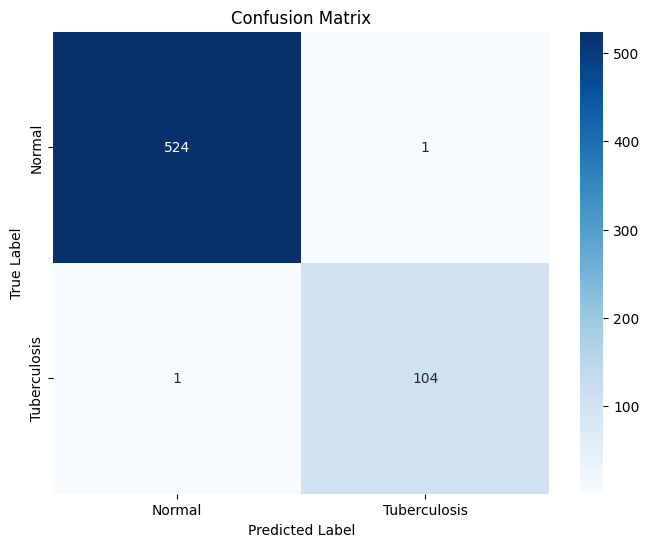

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = model_1X.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Flatten arrays for evaluation
y_test_flat = np.ravel(y_test)
y_pred_flat = np.ravel(y_pred_binary)

# Accuracy
accuracy = accuracy_score(y_test_flat, y_pred_flat)
print(f"Overall Accuracy: {accuracy:.4f}")

# Precision, Recall, F1 Score
precision = precision_score(y_test_flat, y_pred_flat)
recall = recall_score(y_test_flat, y_pred_flat)
f1 = f1_score(y_test_flat, y_pred_flat)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_flat, y_pred_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Tuberculosis"], yticklabels=["Normal", "Tuberculosis"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


20/20 [==============================] - 1s 35ms/step
Accuracy for Class 0 (Normal): 0.9981
Accuracy for Class 1 (Tuberculosis): 0.9905
Precision: 0.9905
Recall: 0.9905
F1 Score: 0.9905


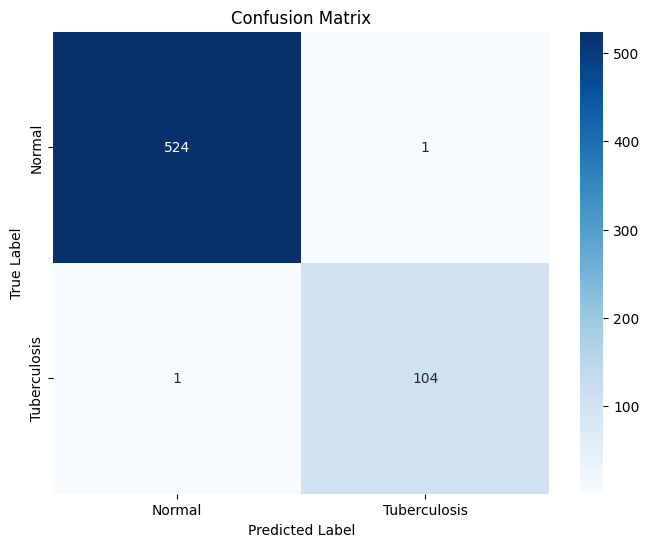

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = model_1X.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Flatten arrays for evaluation
y_test_flat = np.ravel(y_test)
y_pred_flat = np.ravel(y_pred_binary)

# Accuracy for each class
accuracy_class_0 = accuracy_score(y_test_flat[y_test_flat == 0], y_pred_flat[y_test_flat == 0])
accuracy_class_1 = accuracy_score(y_test_flat[y_test_flat == 1], y_pred_flat[y_test_flat == 1])

print(f"Accuracy for Class 0 (Normal): {accuracy_class_0:.4f}")
print(f"Accuracy for Class 1 (Tuberculosis): {accuracy_class_1:.4f}")

# Other metrics (Precision, Recall, F1 Score)
precision = precision_score(y_test_flat, y_pred_flat)
recall = recall_score(y_test_flat, y_pred_flat)
f1 = f1_score(y_test_flat, y_pred_flat)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_flat, y_pred_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Tuberculosis"], yticklabels=["Normal", "Tuberculosis"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
